In [16]:
def find_kt(U):
    kts = []
    for p in U.perm:
        kts.append(bats.kendall_tau(p))
    return sum(kts)

def print_UI(U):
    print("kt-dists: ", find_kt(U))
    print("additions: ", sum([len(idxs) for idxs in U.insertion_indices]))
    print("deletions: ", sum(U.ndeletions))

## Deletion
Decrease Radius

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import bats
import time

def gen_fig_8(n, r=1.0, sigma=0.1):
    X = np.random.randn(n,2)
    X = r * X / np.linalg.norm(X, axis=1).reshape(-1,1)
    X += sigma*np.random.randn(n, 2) + np.random.choice([-1/np.sqrt(2),1/np.sqrt(2)], size=(n,1))
    return X

np.random.seed(0)
n = 150
X = gen_fig_8(n)

In [9]:
def compare_time_del(X, Y, rY ,degree = -1):
    # somehow homology update is faster 
    rX = 4.5
    R0 = bats.LightRipsFiltration(bats.DataSet(bats.Matrix(X)), bats.Euclidean(), rX, 2)
    R1 = bats.LightRipsFiltration(bats.DataSet(bats.Matrix(Y)), bats.Euclidean(), rY, 2)
    
    t0 = time.monotonic()
    DG0 = bats.FilteredF2DGVectorSpace(R0, degree)
    RC0 = bats.ReducedFilteredF2DGVectorSpace(DG0, bats.standard_reduction_flag(), bats.clearing_flag(), bats.compute_basis_flag())
    t1 = time.monotonic()
    print("R0: {:.2f} sec.".format(t1 - t0))

    t0 = time.monotonic()
    DG1 = bats.FilteredF2DGVectorSpace(R1, degree)
    RC1 = bats.ReducedFilteredF2DGVectorSpace(DG1, bats.standard_reduction_flag(), bats.clearing_flag(), bats.compute_basis_flag())
    t1 = time.monotonic()
    print("R1: {:.2f} sec.".format(t1 - t0))

    t0 = time.monotonic()
    U = bats.UpdateInfo2(R0, R1)
    t1 = time.monotonic()
    print("find UpdatInfo: {:.2f} sec.".format(t1 - t0))
    print_UI(U)
#     print([len(inds) for inds in U.insertion_indices])
    ndel = sum(U.ndeletions)

    t0 = time.monotonic()
    RC0.update(U)
    t1 = time.monotonic()
    print("update: {:.2f} sec.".format(t1 - t0))
    upd_time = t1 - t0
    
    return upd_time, ndel

In [19]:
rs = [4.2, 4.15, 4.1, 4.05, 4.0, 3.5, 3.0, 2.5, 2.0, 1.0, 0.0]
# rs = [4.0, 3.5]
n_rep = 5
ndels = []
up_time = []
for i in range(n_rep):
    for r in rs:
        print("r = ", r)
        t, ndel = compare_time_del(X, X, r, -1)
        up_time.append(t)
        ndels.append(ndel)
        print()

r =  4.2
R0: 1.84 sec.
R1: 1.97 sec.
find UpdatInfo: 0.14 sec.
kt-dists:  0
additions:  0
deletions:  741
update: 0.17 sec.

r =  4.15
R0: 1.84 sec.
R1: 1.86 sec.
find UpdatInfo: 0.13 sec.
kt-dists:  0
additions:  0
deletions:  2336
update: 0.15 sec.

r =  4.1
R0: 1.84 sec.
R1: 1.85 sec.
find UpdatInfo: 0.13 sec.
kt-dists:  0
additions:  0
deletions:  5460
update: 0.15 sec.

r =  4.05
R0: 1.84 sec.
R1: 1.78 sec.
find UpdatInfo: 0.13 sec.
kt-dists:  0
additions:  0
deletions:  8115
update: 0.15 sec.

r =  4.0
R0: 1.82 sec.
R1: 1.80 sec.
find UpdatInfo: 0.14 sec.
kt-dists:  0
additions:  0
deletions:  14153
update: 0.15 sec.

r =  3.5
R0: 1.82 sec.
R1: 1.45 sec.
find UpdatInfo: 0.11 sec.
kt-dists:  0
additions:  0
deletions:  97475
update: 0.17 sec.

r =  3.0
R0: 1.83 sec.
R1: 1.20 sec.
find UpdatInfo: 0.10 sec.
kt-dists:  0
additions:  0
deletions:  179621
update: 0.18 sec.

r =  2.5
R0: 1.86 sec.
R1: 0.94 sec.
find UpdatInfo: 0.09 sec.
kt-dists:  0
additions:  0
deletions:  255895
upda

In [20]:
rec = [ndels, up_time]

import pandas as pd
df = pd.DataFrame(rec)
df.to_csv('rec_del.csv', index=False)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

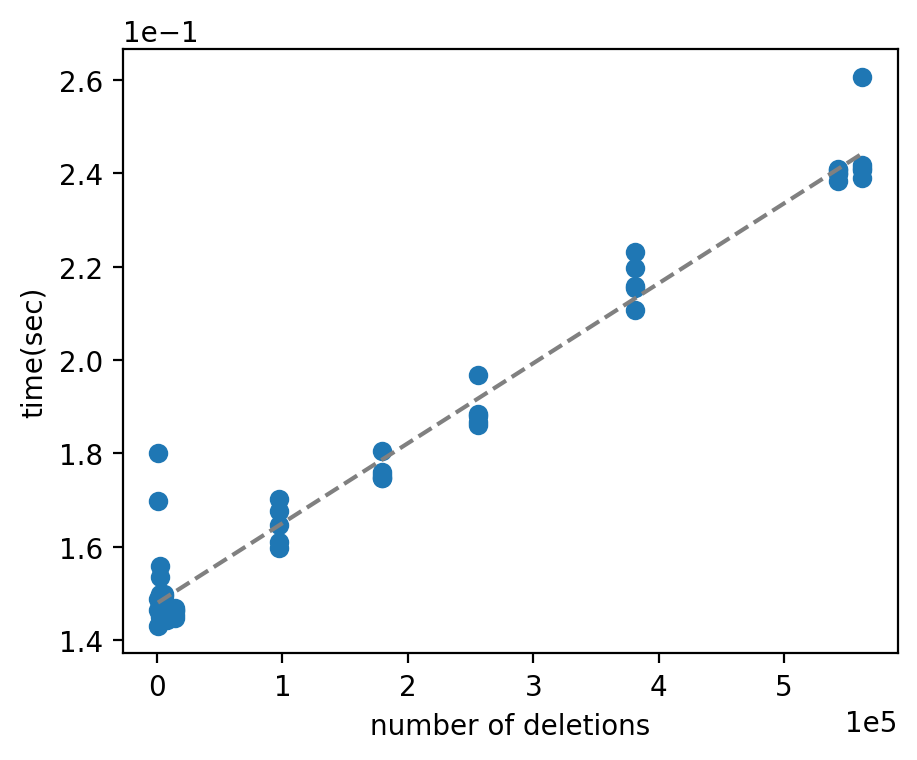

In [3]:
df2 = pd.read_csv('rec_del.csv')
a = df2.to_numpy()

# plt.xscale('log')
# plt.yscale('log')

plt.figure(figsize=(5, 4), dpi=200)
plt.scatter(a[0], a[1])
m, b = np.polyfit(a[0], a[1], 1)
x = np.sort(a[0])
plt.plot(x, m*x+b, color='grey', linestyle='dashed')
plt.xlabel("number of deletions")
plt.ylabel("time(sec)")
plt.ticklabel_format(scilimits=(1,2))
plt.savefig('rips_del.pdf', dpi=200, bbox_inches='tight')

In [18]:
# cohomology is slower...
rs = [4.0, 3.5]
n_rep = 1
ndels = []
up_time = []
for i in range(n_rep):
    for r in rs:
        t, ndel = compare_time_del(X, X, r, +1)
        up_time.append(t)
        ndels.append(ndel)

R0: 0.30 sec.
R1: 0.29 sec.
find UpdatInfo: 0.12 sec.
kt-dists:  0
additions:  0
deletions:  14153
update: 0.43 sec.
R0: 0.30 sec.
R1: 0.26 sec.
find UpdatInfo: 0.10 sec.
kt-dists:  0
additions:  0
deletions:  97475
update: 0.37 sec.
